# Iris flowers classification

## Setup

### Import libraries

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import utils

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import accuracy_score

PROJECT_ROOT_DIR = "."
IMAGES_DIR = '/images'

## Get the data

In [2]:
from sklearn import datasets

iris = datasets.load_iris()

## Take a quick look at the Data Structure

In [3]:
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [4]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [5]:
iris.data.shape

(150, 4)

In [6]:
iris.data[:10, :]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

In [7]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [8]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [9]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [10]:
from pandas import DataFrame

iris_df = DataFrame(iris.data, columns=iris.feature_names)
iris_df["target"] = iris.target

iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [11]:
corr_matrix = iris_df.iloc[:, :-1].corr()

corr_matrix

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


We notice that values in petal and pental width are skrewed.
Also, a strong correlation exists between 
* petal length and sepal length(0.871), 
* petal width and sepal length(0.818), 
* petal width and length(0.963).

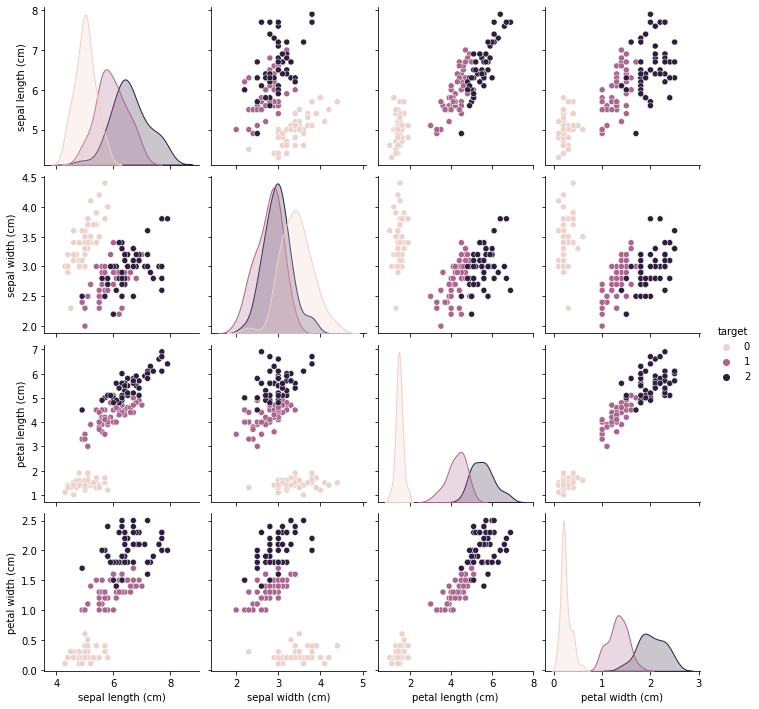

In [29]:
ax = sns.pairplot(iris_df, hue="target")
PAIRPLOT_DIR = '/pairplot.png'
ax.savefig(PROJECT_ROOT_DIR + IMAGES_DIR + PAIRPLOT_DIR)

plt.show()

## Prepare the data for ML learning Algorithms

In [13]:
X = iris.data
y = iris.target

### Do stratified sampling based on the iris category

In [6]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

## SGDClassification

In [34]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(max_iter=1000, tol=1e-3, random_state=42)
sgd_clf.fit(X_train, y_train)

SGDClassifier(random_state=42)

In [35]:
y_pred = sgd_clf.predict(X_test)
accuracy_score(y_pred, y_test)

0.7666666666666667

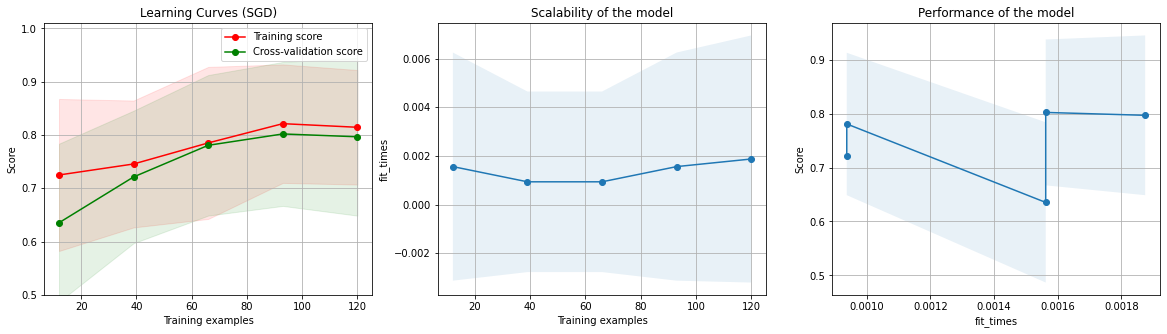

In [45]:
title = "Learning Curves (SGD)"

cv = ShuffleSplit(n_splits=50, test_size=0.2, random_state=42)
plt=utils.plot.plot_learning_curve(
    sgd_clf, title, X.tolist(), y.tolist(), ylim=(0.5, 1.01), cv=cv, n_jobs=4
)
plt.savefig(PROJECT_ROOT_DIR+IMAGES_DIR+'/SGD_learning_curves.png')
plt.show()

## Softmax Classification

In [46]:
from sklearn.linear_model import LogisticRegression

softmax_reg = LogisticRegression(
    multi_class="multinomial",
    solver="lbfgs", 
    C=10,
    max_iter=1e5,
)
softmax_reg.fit(X_train, y_train)

LogisticRegression(C=10, max_iter=100000.0, multi_class='multinomial')

In [54]:
score = cross_val_score(softmax_reg, X_train, y_train, cv=5, scoring="accuracy")

print('accuracy: %.3f'%score.mean())

accuracy: 0.967


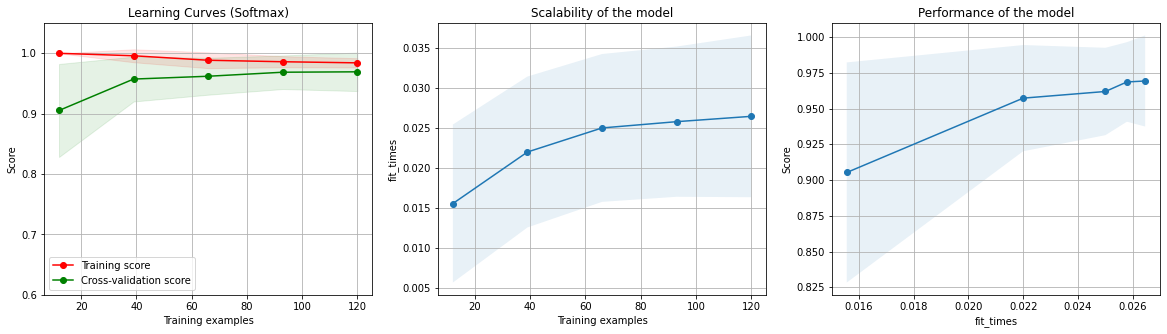

In [50]:
title = "Learning Curves (Softmax)"

cv = ShuffleSplit(n_splits=50, test_size=0.2, random_state=42)
utils.plot.plot_learning_curve(
    softmax_reg, title, X.tolist(), y.tolist(), ylim=(0.6, 1.05), cv=cv, n_jobs=4
)
plt.savefig(PROJECT_ROOT_DIR+IMAGES_DIR+'/softmax_learning_curves.png')
plt.show()

## Decision Tree Classification

### Before Fine Tuning

In [55]:
from sklearn import tree

tree_clf = tree.DecisionTreeClassifier()
score = cross_val_score(tree_clf, X_train, y_train, cv=5, scoring="accuracy")
print('accuracy: %.3f'%score.mean())

accuracy: 0.933


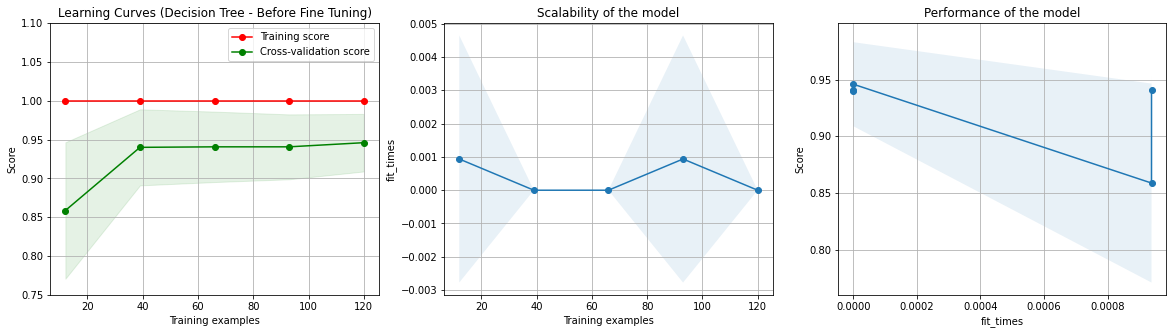

In [58]:
title = "Learning Curves (Decision Tree - Before Fine Tuning)"
utils.plot.plot_learning_curve(
    tree_clf, title, X.tolist(), y.tolist(), ylim=(0.75, 1.1), cv=cv, n_jobs=4
)
plt.savefig(PROJECT_ROOT_DIR+IMAGES_DIR+'/decision_tree_learning_curves_before.png')
plt.show()

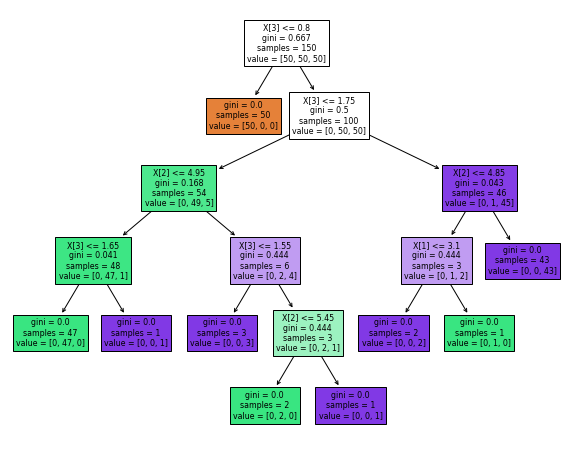

In [63]:
tree_clf.fit(X, y)

plt.figure(figsize=(10,8))
tree.plot_tree(tree_clf, filled=True)
plt.savefig(PROJECT_ROOT_DIR+IMAGES_DIR+'/tree_before_tuning.png')
plt.show()

### Randmized Search

In [81]:
from sklearn.model_selection import GridSearchCV

grid = {
    "max_depth": list(range(3, 7)),
    "max_features": list(range(1, 5)), # range \in (0, n_features]
    "max_leaf_nodes": list(range(2, 9)),
    "criterion": ['gini', 'entropy'],
}

clf = tree.DecisionTreeClassifier()
search = GridSearchCV(
    estimator=clf, param_grid = grid,
    cv = 5, verbose=2, n_jobs = 4
    )
search.fit(X, y)

Fitting 5 folds for each of 224 candidates, totalling 1120 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=4,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 4, 5, 6],
                         'max_features': [1, 2, 3, 4],
                         'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8]},
             verbose=2)

In [82]:
search.best_params_

{'criterion': 'gini', 'max_depth': 3, 'max_features': 4, 'max_leaf_nodes': 5}

In [84]:
search.best_score_

0.9733333333333334

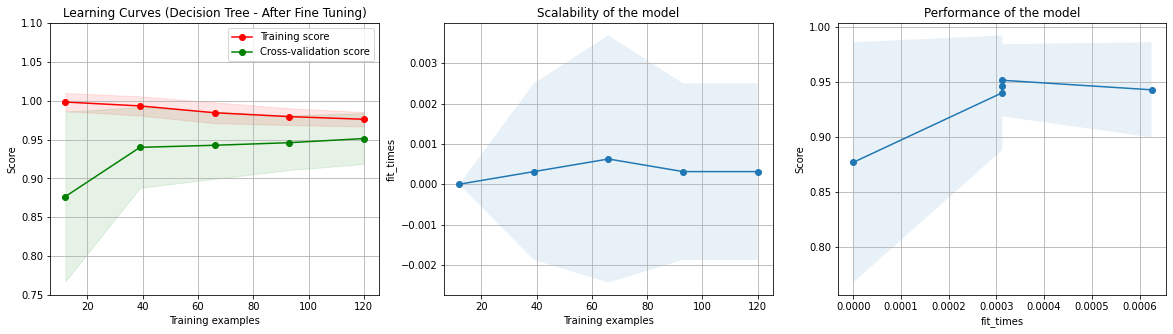

In [85]:
best_tree_clf = tree.DecisionTreeClassifier(**search.best_params_)
title = "Learning Curves (Decision Tree - After Fine Tuning)"
utils.plot.plot_learning_curve(
    best_tree_clf, title, X.tolist(), y.tolist(), ylim=(0.75, 1.1), cv=cv, n_jobs=4
)
plt.savefig(PROJECT_ROOT_DIR+IMAGES_DIR+'/decision_tree_learning_curves_after.png')
plt.show()

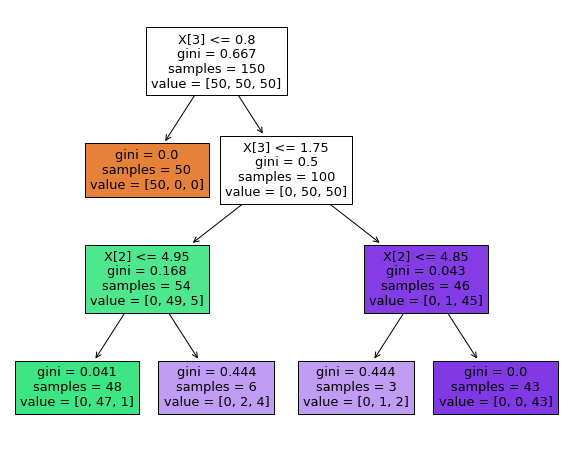

In [86]:
best_tree_clf.fit(X, y)
plt.figure(figsize=(10,8))
tree.plot_tree(best_tree_clf, filled=True)
plt.savefig(PROJECT_ROOT_DIR+IMAGES_DIR+'/tree_after_tuning.png')
plt.show()

## Error Analysis

In [14]:
from sklearn import tree
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

params = {'criterion': 'gini', 'max_depth': 3, 'max_features': 4, 'max_leaf_nodes': 5}
best_tree_clf = tree.DecisionTreeClassifier(**params)
y_pred = cross_val_predict(best_tree_clf, X, y, cv=5)
conf_mx = confusion_matrix(y, y_pred)
conf_mx

array([[50,  0,  0],
       [ 0, 48,  2],
       [ 0,  2, 48]], dtype=int64)

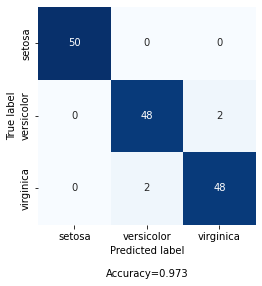

In [16]:
import utils

utils.plot.make_confusion_matrix(
    cf=conf_mx, categories=iris.target_names,
    cmap='Blues', cbar=False
)
plt.savefig(PROJECT_ROOT_DIR+IMAGES_DIR+'/conf_mx.png')

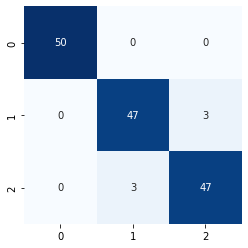

In [125]:
categories = iris.target_names
sns.heatmap(
    data=conf_mx, annot=conf_mx,
    cmap='Blues', cbar=False, square=True,
)
plt.show()

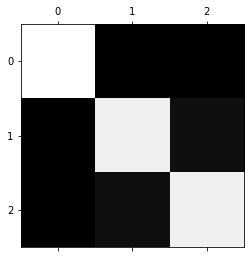

In [88]:
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

The confusion matrix looks fairly good. But 2 elements in class 1 are mistakenly classified into class 2 and 4 elements in class 2 into class 1.

Let's focus on these errors.

In [116]:
from pandas import DataFrame

iris_df = DataFrame(iris.data, columns=iris.feature_names)

cat = []
y_pred = cross_val_predict(best_tree_clf, iris.data, iris.target, cv=5)
y_true = iris.target
for i in range(len(iris.target)):
    temp = ''
    if (y_true[i] == y_pred[i]):
        temp = iris.target_names[y_true[i]]
    else:
        temp = '{} is mistaken to {}'.format(
            iris.target_names[y_true[i]],
            iris.target_names[y_pred[i]]
        )
    cat.append(temp)

iris_df['cat'] = cat
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),cat
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


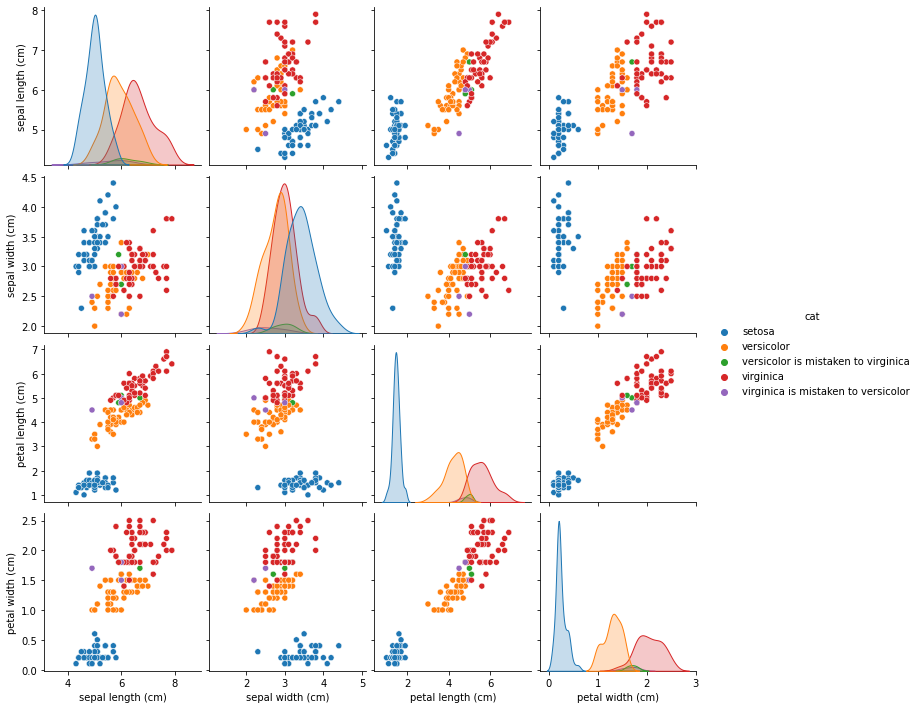

In [117]:
ax = sns.pairplot(iris_df, hue='cat')
ax.savefig(PROJECT_ROOT_DIR + IMAGES_DIR + '/error_pairplot.png')

plt.show()

We notice that all error occurs at the edge of vericolor and virginica cluster.